In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [41]:
relative_path = "../data/raw/hotel_booking.csv"
df = pd.read_csv(relative_path)

In [178]:
# Overview of all the columns in dataset
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [182]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data Cleaning & EDA visualizations 

In [ ]:

# creating an id for every transaction/guest 
df_with_id =df.reset_index().rename(columns={"index":"guest_id"})
df_with_id.head()

In [184]:
df_with_id["arrival_date_year"].unique()

array([2015, 2016, 2017])

In [53]:
# Grouping check-ins by hotel per date month, calculating a mean of the 3 years. Trying to find a pattern of reservations throughtout the year. 

df_grouped = df_with_id.groupby(['hotel','arrival_date_year','arrival_date_month']).count()[['guest_id']].rename(columns={"guest_id":"arrivals"})
df_grouped = df_grouped.reset_index()
df_grouped['arrival_month']= pd.to_datetime(df_grouped['arrival_date_month'], format="%B").dt.month
df_grouped = df_grouped.sort_values(by=['hotel','arrival_date_year', 'arrival_month'])
df_grouped = df_grouped.groupby(['hotel','arrival_month']).agg({"arrivals":'mean'}).reset_index()
df_grouped

,hotel,arrival_month,arrivals
0,City Hotel,1,1868.000000
1,City Hotel,2,2482.500000
2,City Hotel,3,3229.000000
3,City Hotel,4,3740.000000
4,City Hotel,5,4116.000000
5,City Hotel,6,3947.000000
6,City Hotel,7,2696.000000
7,City Hotel,8,2994.333333
8,City Hotel,9,3700.000000
9,City Hotel,10,3802.500000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

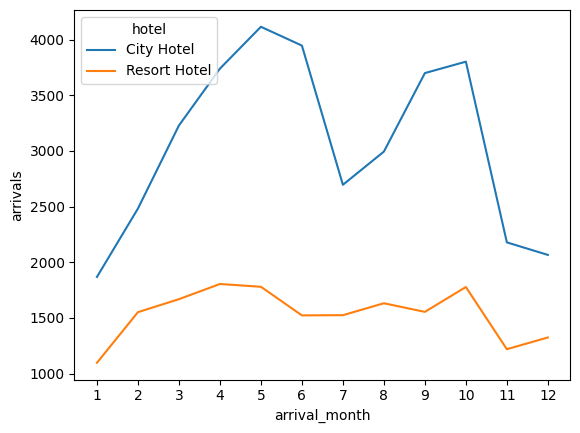

In [54]:
# Plotting a graph of the average check-ins per month for the two hotels
import numpy as np

ax=sns.lineplot(data=df_grouped, x='arrival_month', y='arrivals', hue='hotel')
ax.set_xticks(np.arange(1,13))
plt.show()

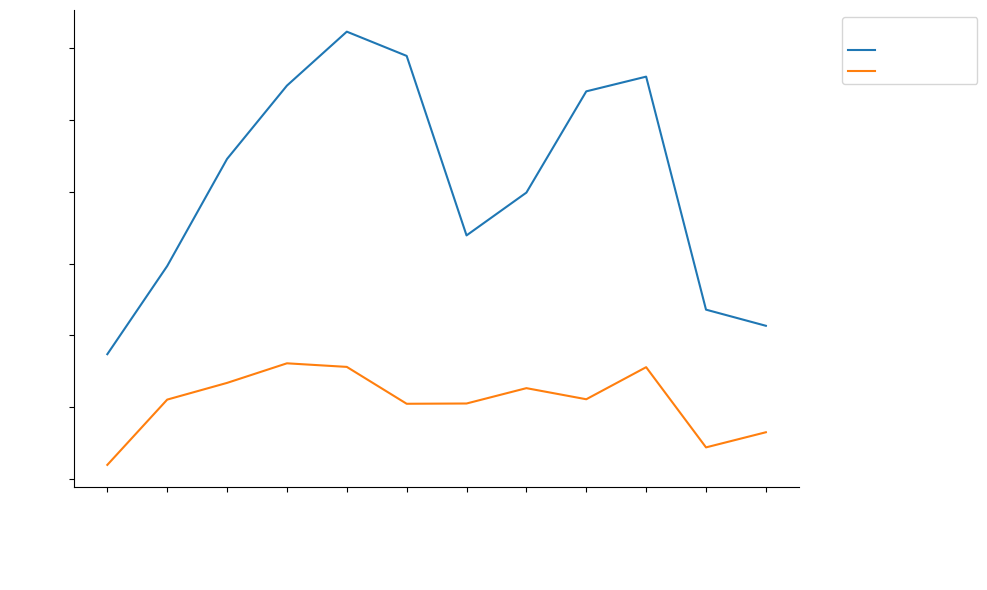

In [55]:
# Same graph above, used in the presentation

# Assuming df_grouped is your DataFrame
df_grouped = df_with_id.groupby(['hotel', 'arrival_date_year', 'arrival_date_month']).count()[['guest_id']].rename(columns={"guest_id": "arrivals"})
df_grouped = df_grouped.reset_index()
df_grouped['arrival_month'] = pd.to_datetime(df_grouped['arrival_date_month'], format="%B").dt.month
df_grouped = df_grouped.sort_values(by=['hotel', 'arrival_date_year', 'arrival_month'])
df_grouped = df_grouped.groupby(['hotel', 'arrival_month']).agg({"arrivals": 'mean'}).reset_index()

# Convert month numbers to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_grouped['arrival_month'] = df_grouped['arrival_month'].map(lambda x: month_names[x - 1])

# Plot the data with lines
plt.figure(figsize=(10, 6))
for hotel, data in df_grouped.groupby('hotel'):
    plt.plot(data['arrival_month'], data['arrivals'], label=hotel)

# Set labels and title
plt.xlabel('Month', color='white')
plt.ylabel('Average Number of Arrivals', color='white')
#plt.title('Average Number of Arrivals by Month and Hotel', color='white')

# Customize legend position and color
legend = plt.legend(title='Hotel', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.setp(legend.get_texts(), color='white')  # Set legend text color to white
plt.setp(legend.get_title(), color='white')  # Set legend title color to white

# Rotate x-axis tick labels diagonally
plt.xticks(rotation=45, color='white')

# Set y-axis tick labels color to white
plt.yticks(color='white')

# Remove grid and background
plt.grid(False)
plt.gca().set_facecolor('None')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the plot
save_path = '../images/average_arrivals_by_month_and_hotel.png'
plt.savefig(save_path, transparent=True, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


In [198]:
# looking for missing values
df.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
days_in_waiting_list              False


In [60]:
#creating a copy of dataset 
test2 = df.copy()

In [62]:
#replace the null values of "children" for the value mode 
df['children'] = df['children'].fillna(df['children'].mode()[0])

#replace the null values of "country" for backwardfill 

df['country'] = df['country'].fillna(method='bfill')

#replace the null values of "agent" for the value of mode
df['agent'] = df['agent'].fillna(df['agent'].mode()[0])


/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_2739/2366600341.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['country'] = df['country'].fillna(method='bfill')


In [64]:
#Dropping column "company", 94% of the values are NaN. For this reason the best to do is just drop the column. 

df.drop('company', axis=1, inplace=True)


In [65]:
# Define the expected date format
date_format = "%Y-%m-%d"

# Check if dates in a specific column follow the same format
column_name = 'reservation_status_date'

# Parse dates using the specified format and catch any parsing errors
try:
    pd.to_datetime(test2["reservation_status_date"], format=date_format, errors='raise')
    print(f"All dates in column '{column_name}' follow the format {date_format}.")
except ValueError as e:
    print(f"Not all dates in column '{column_name}' follow the format {date_format}.")
    print(f"Error message: {e}")

All dates in column 'reservation_status_date' follow the format %Y-%m-%d.


In [66]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [67]:
# filtering data by name of the hotels

filtered_data = test2[(test2['hotel'] == 'Resort Hotel') | (test2['hotel'] == 'City Hotel')]

# Step 2: Group the filtered DataFrame by "policy_type" and "gender"
grouped_data = filtered_data.groupby(['hotel', 'is_canceled', "arrival_date_year"]).size()


In [68]:
#display the grouped_data
display(grouped_data)

hotel         is_canceled  arrival_date_year
City Hotel    0            2015                  7678
                           2016                 22733
                           2017                 15817
              1            2015                  6004
                           2016                 15407
                           2017                 11691
Resort Hotel  0            2015                  6176
                           2016                 13637
                           2017                  9125
              1            2015                  2138
                           2016                  4930
                           2017                  4054
dtype: int64

In [69]:
df["arrival_date_year"]

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119385    2017
119386    2017
119387    2017
119388    2017
119389    2017
Name: arrival_date_year, Length: 119390, dtype: int64

In [71]:
#checking unique values of market_segment
test2["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [72]:
#checking unique values of distribution_channel

test2["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

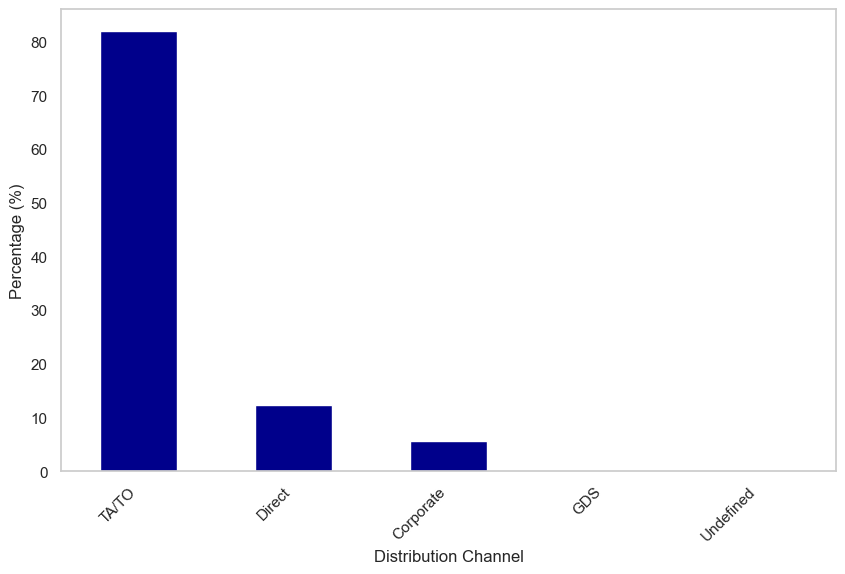

In [74]:
#plotting a graph showing a percentage of distribution_channel

# Calculate value counts for the distribution_channel column and normalize to get percentages
distribution_counts = df['distribution_channel'].value_counts(normalize=True) * 100

# Set figure size
plt.figure(figsize=(10, 6))

# Plot the distribution with dark blue color
ax = distribution_counts.plot(kind='bar', grid=False, color='darkblue')

# Add labels and title
plt.xlabel('Distribution Channel')
plt.ylabel('Percentage (%)')

# Rotate the x-axis labels diagonally
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Save the plot
save_path_5 = '../images/distribution_of_distribution_channels.png'
plt.savefig(save_path_5)

# Show plot
plt.show()

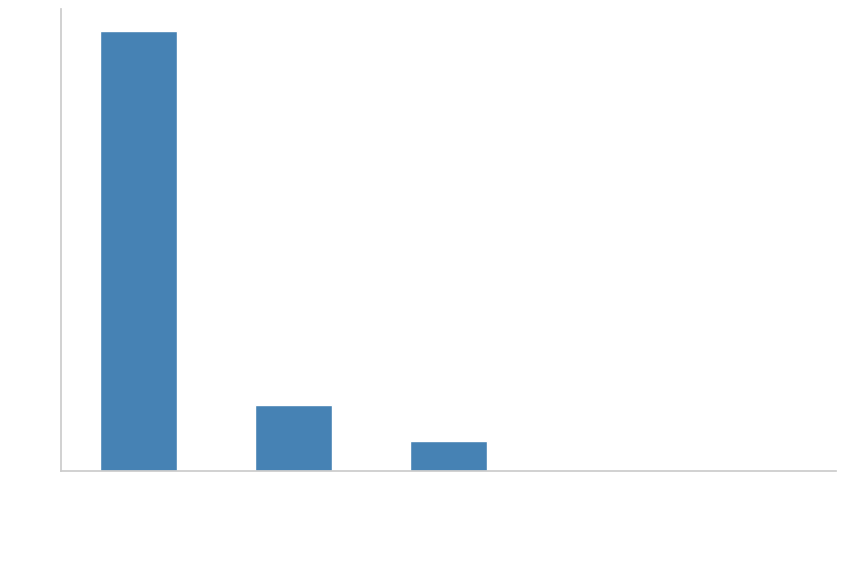

In [75]:
# Same graph above, used in the presentation

# Calculate value counts for the distribution_channel column and normalize to get percentages
distribution_counts = df['distribution_channel'].value_counts(normalize=True) * 100

# Set figure size
plt.figure(figsize=(10, 6))

# Plot the distribution with dark red or maroon color
ax = distribution_counts.plot(kind='bar', grid=False, color='steelblue')

# Add labels and title with white text
plt.xlabel('Booking channel', color='white')  # Set x-axis label color to white
plt.ylabel('Percentage (%)', color='white')  # Set y-axis label color to white
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Set the background color of the figure to None (fully transparent)
ax.set_facecolor('None')

# Remove the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot
save_path_5 = '../images/distribution_of_distribution_channels.png'
plt.savefig(save_path_5, transparent=True, bbox_inches='tight')


In [76]:
specific_rows = test2[(test2["distribution_channel"] == "GDS")]


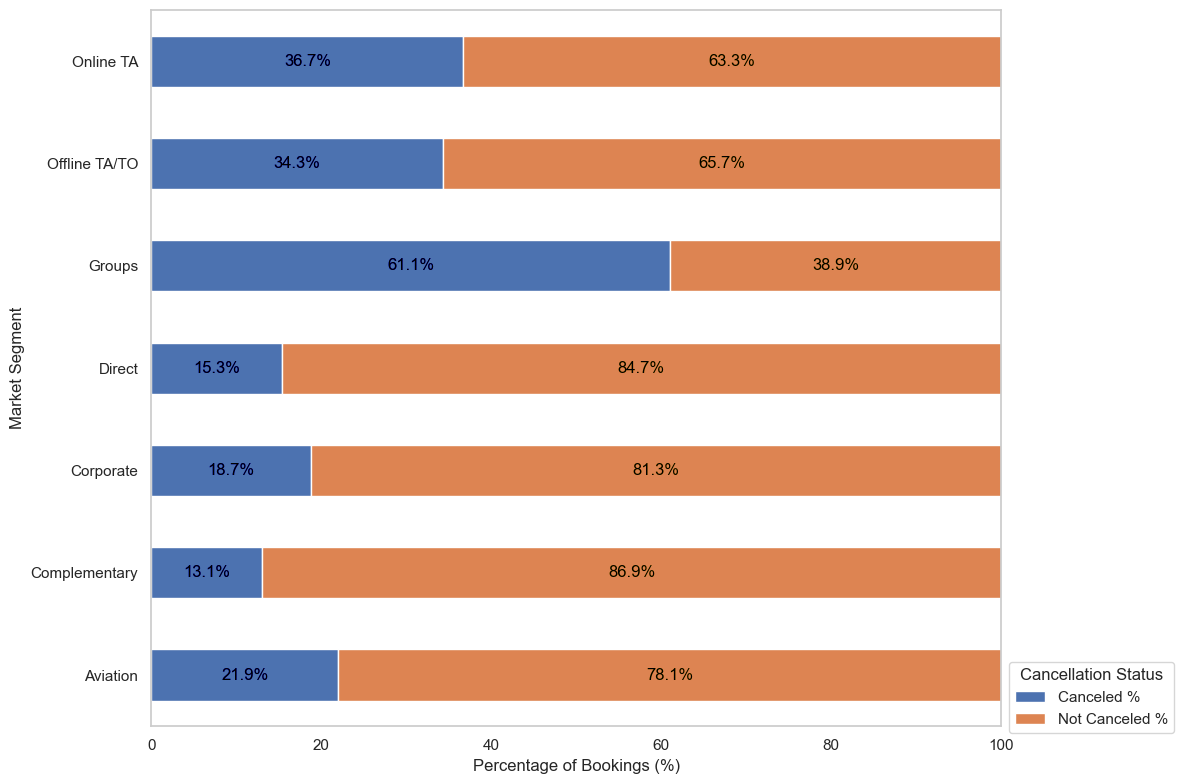

In [78]:
# plotting a percentage of cancelation and non cancelation by market_segment 

# Remove "Undefined" market segment
test2 = test2[test2['market_segment'] != 'Undefined']

# Define the reversed order of market segments
market_segment_order = ["Aviation", "Complementary", "Corporate", "Direct", "Groups", "Offline TA/TO", "Online TA"]

# Group by market_segment and is_canceled and count the occurrences
aggregated_data = test2.groupby(['market_segment', 'is_canceled']).size().unstack(fill_value=0)

# Reindex the aggregated data to the desired order
aggregated_data = aggregated_data.reindex(market_segment_order)

# Calculate percentage of canceled and not canceled bookings
aggregated_data['Total'] = aggregated_data.sum(axis=1)
aggregated_data['Canceled %'] = aggregated_data[1] / aggregated_data['Total'] * 100
aggregated_data['Not Canceled %'] = aggregated_data[0] / aggregated_data['Total'] * 100

# Plot the data
ax = aggregated_data[['Canceled %', 'Not Canceled %']].plot(kind='barh', stacked=True, figsize=(12, 8))

# Set the plot title and labels
#plt.title('Cancellation Percentage by Market Segment')
plt.ylabel('Market Segment')
plt.xlabel('Percentage of Bookings (%)')
plt.xlim(0, 100)  # Set x-axis limit to 100 for percentage

# Remove grid
plt.grid(False)

# Place percentage values inside each bar
for i, (p_cancelled, p_not_cancelled) in enumerate(zip(aggregated_data['Canceled %'], aggregated_data['Not Canceled %'])):
    ax.text(p_cancelled / 2, i, f'{p_cancelled:.1f}%', color='blue', ha='center', va='center')
    ax.text(100 - p_not_cancelled / 2, i, f'{p_not_cancelled:.1f}%', color='orange', ha='center', va='center')

    # Set color of percentage numbers to black
    ax.text(p_cancelled / 2, i, f'{p_cancelled:.1f}%', color='black', ha='center', va='center')
    ax.text(100 - p_not_cancelled / 2, i, f'{p_not_cancelled:.1f}%', color='black', ha='center', va='center')

# Customize legend position
plt.legend(title='Cancellation Status', loc='upper left', bbox_to_anchor=(1, 0.1))

# Show the plot
plt.tight_layout()
plt.show()


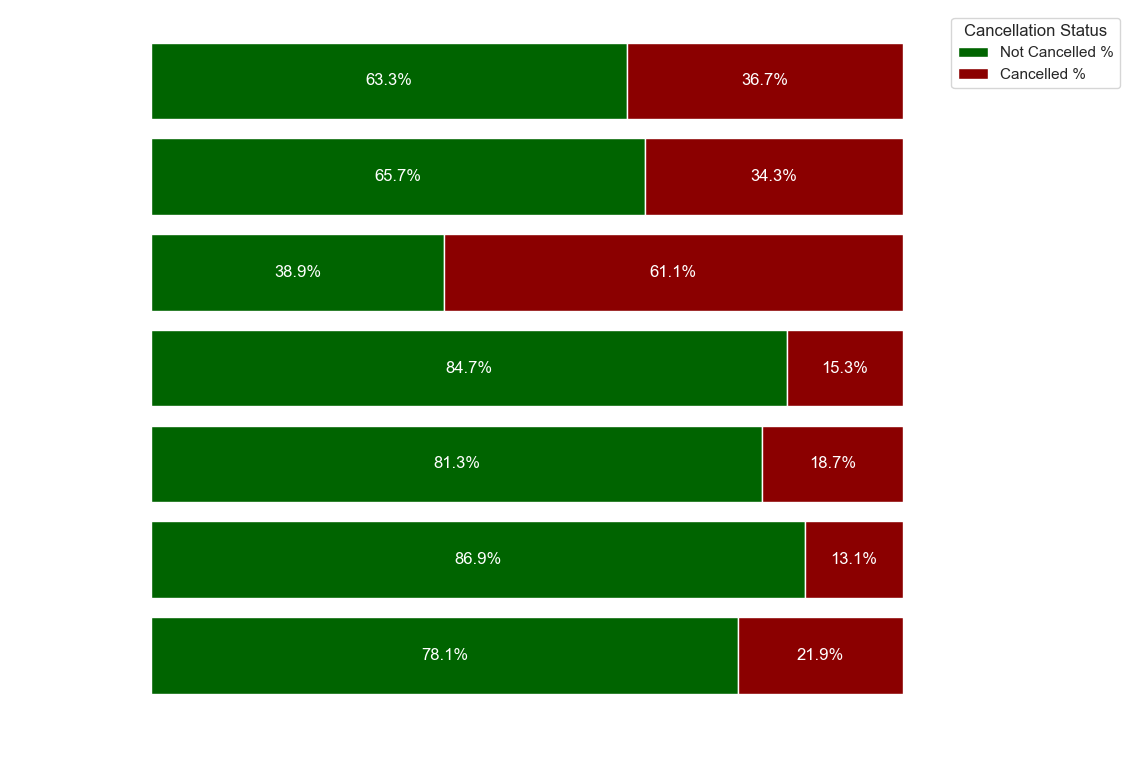

In [79]:
# Same graph above, used in the presentation

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(aggregated_data.index, aggregated_data['Not Canceled %'], color='darkgreen', label='Not Cancelled %')
plt.barh(aggregated_data.index, aggregated_data['Canceled %'], left=aggregated_data['Not Canceled %'], color='darkred', label='Cancelled %')

# Set the plot title and labels
plt.ylabel('Market Segment', color='white')  # Set y-axis label color to white
plt.xlabel('Percentage of Bookings (%)', color='white')  # Set x-axis label color to white
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlim(0, 100)  # Set x-axis limit to 100 for percentage

# Place percentage values inside each bar
for i, (p_not_cancelled, p_cancelled) in enumerate(zip(aggregated_data['Not Canceled %'], aggregated_data['Canceled %'])):
    plt.text(p_not_cancelled / 2, i, f'{p_not_cancelled:.1f}%', color='white', ha='center', va='center')
    plt.text(p_not_cancelled + p_cancelled / 2, i, f'{p_cancelled:.1f}%', color='white', ha='center', va='center')

# Customize legend position
plt.legend(title='Cancellation Status', loc='upper right', bbox_to_anchor=(1.3, 1))

# Remove spines and grid
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)

# Remove background color
plt.gca().set_facecolor('None')

# Save the plot
save_path_4 = '../images/cancellation_percentage_by_market_segment.png'
plt.savefig(save_path_4, transparent=True, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


In [200]:
# Find the index of rows where ADR is negative
negative_adr_index = test2.index[test2['adr'] < 0]

# Drop the rows with negative ADR
test2.drop(index=negative_adr_index, inplace=True)

In [85]:
#function to categorize lead time 

def categorize_lead_time(lead_time):
    if lead_time <= 93:
        return "< 3 months"
    elif 93 < lead_time <= 186:
        return "3 - 6 months"
    elif 186 < lead_time <= 279:
        return "6 - 9 months"
    elif 279 < lead_time <= 365:
        return "9 - 12 months"
    elif 365 < lead_time <= 458:
        return "12 - 15 months"
    elif 458 < lead_time <= 551:
        return "15 - 18 months"
    else:
        return "> 18 months"

In [86]:
#creating a new column "lead_time_sorted"
test2["lead_time_sorted"] = test2["lead_time"].apply(categorize_lead_time)

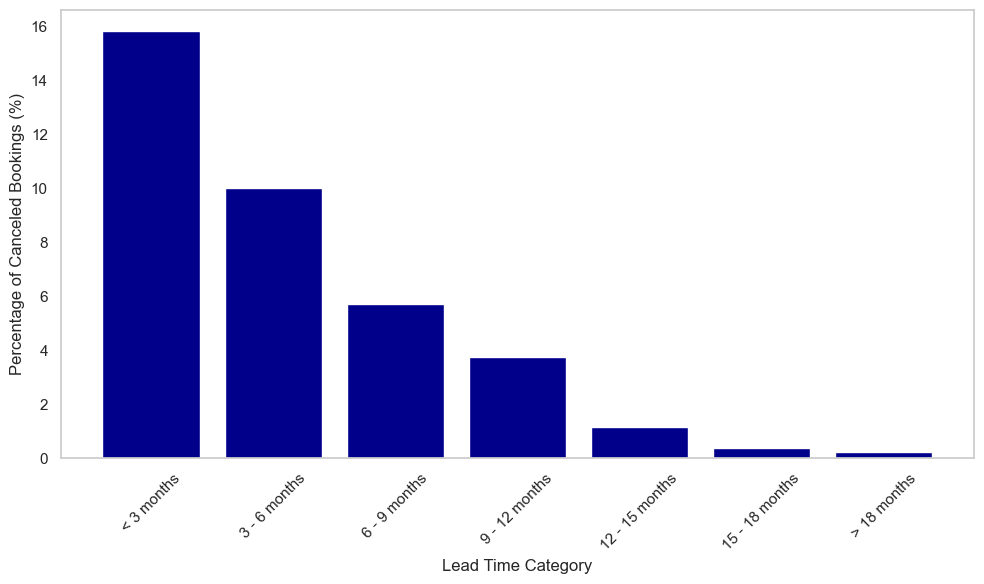

In [91]:
# Assuming test2 is your DataFrame and 'is_canceled' is the column indicating canceled bookings in percentage

# Calculate the total number of rows in the DataFrame
total_rows = len(test2)

# Group the DataFrame by lead_time_sorted and calculate the count of canceled bookings for each category
cancelled_counts = test2[test2['is_canceled'] == 1].groupby('lead_time_sorted').size()

# Calculate the percentage of canceled bookings relative to the total number of rows for each lead time category
cancelled_percentage = (cancelled_counts / total_rows) * 100

# Create a DataFrame with the calculated percentages
cancelled_percentage_df = cancelled_percentage.reset_index()
cancelled_percentage_df.columns = ['Lead Time Category', 'Percentage of Canceled Bookings']

# Define the order of lead time categories
category_order = ['< 3 months', '3 - 6 months', '6 - 9 months', '9 - 12 months', '12 - 15 months', '15 - 18 months', '> 18 months']

# Sort the DataFrame by the calculated percentages in ascending order of category_order
cancelled_percentage_sorted = cancelled_percentage_df.sort_values(by='Lead Time Category', key=lambda x: pd.Categorical(x, categories=category_order, ordered=True))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(cancelled_percentage_sorted['Lead Time Category'], cancelled_percentage_sorted['Percentage of Canceled Bookings'], color='darkblue')
#plt.title('Percentage of Canceled Bookings by Lead Time Category')
plt.xlabel('Lead Time Category')
plt.ylabel('Percentage of Canceled Bookings (%)')
plt.xticks(rotation=45)
plt.grid(False)  # Remove grid lines
plt.tight_layout()
save_path_3 = '../images/percenta_of_canceled_bookings.png'
plt.savefig(save_path_3)
plt.show()


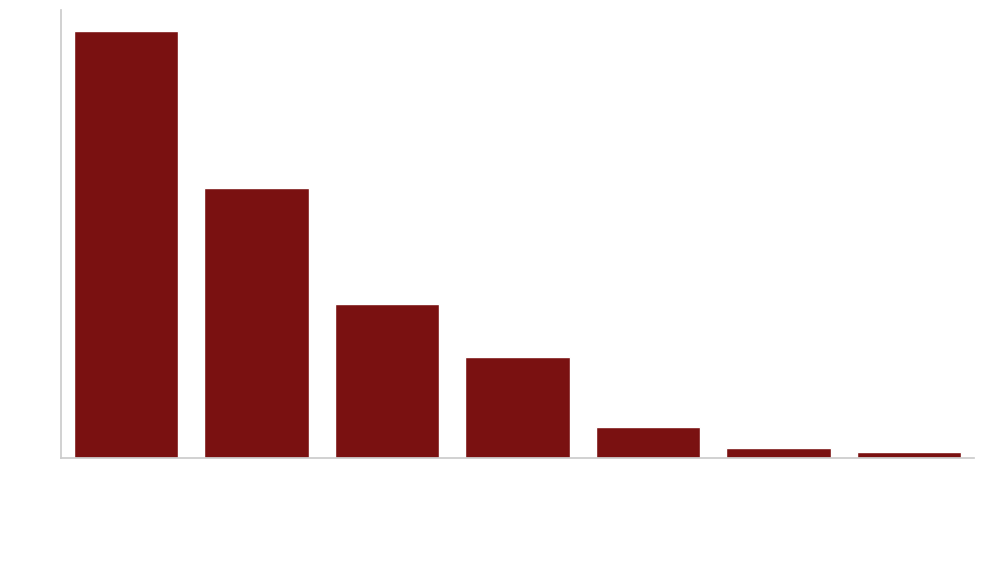

In [92]:
# same graph above used in the presentation 

# Assuming test2 is your DataFrame and 'is_canceled' is the column indicating canceled bookings

# Calculate the total number of rows in the DataFrame
total_rows = len(test2)

# Group the DataFrame by lead_time_sorted and calculate the count of canceled bookings for each category
cancelled_counts = test2[test2['is_canceled'] == 1].groupby('lead_time_sorted').size()

# Calculate the percentage of canceled bookings relative to the total number of rows for each lead time category
cancelled_percentage = (cancelled_counts / total_rows) * 100

# Create a DataFrame with the calculated percentages
cancelled_percentage_df = cancelled_percentage.reset_index()
cancelled_percentage_df.columns = ['Lead Time Category', 'Percentage of Canceled Bookings']

# Define the order of lead time categories
category_order = ['< 3 months', '3 - 6 months', '6 - 9 months', '9 - 12 months', '12 - 15 months', '15 - 18 months', '> 18 months']

# Sort the DataFrame by the calculated percentages in ascending order of category_order
cancelled_percentage_sorted = cancelled_percentage_df.sort_values(by='Lead Time Category', key=lambda x: pd.Categorical(x, categories=category_order, ordered=True))

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Lead Time Category', y='Percentage of Canceled Bookings', data=cancelled_percentage_sorted, color='darkred')

# Add labels and title
plt.xlabel('Lead Time Category', color='white')
plt.ylabel('Percentage of Cancelled Bookings (%)', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(False)  # Remove grid lines
plt.tight_layout()

# Set the background color of the figure to be transparent
ax.set_facecolor('none')

# Remove the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot with transparent background
save_path_3 = '../images/percentage_of_canceled_bookings.png'
plt.savefig(save_path_3, transparent=True)

plt.show()



In [93]:
# Calculate the total number of rows in the DataFrame
total_rows = len(test2)

# Count the number of canceled bookings
cancelled_bookings = test2['is_canceled'].sum()

# Calculate the percentage of canceled bookings
cancelled_percentage = (cancelled_bookings / total_rows) * 100

print("Overall percentage of canceled bookings:", cancelled_percentage)

Overall percentage of canceled bookings: 37.040883848325194


In [106]:
#total number of countries 
num_unique_countries = len(test2["country"].unique())


<function matplotlib.pyplot.show(close=None, block=None)>

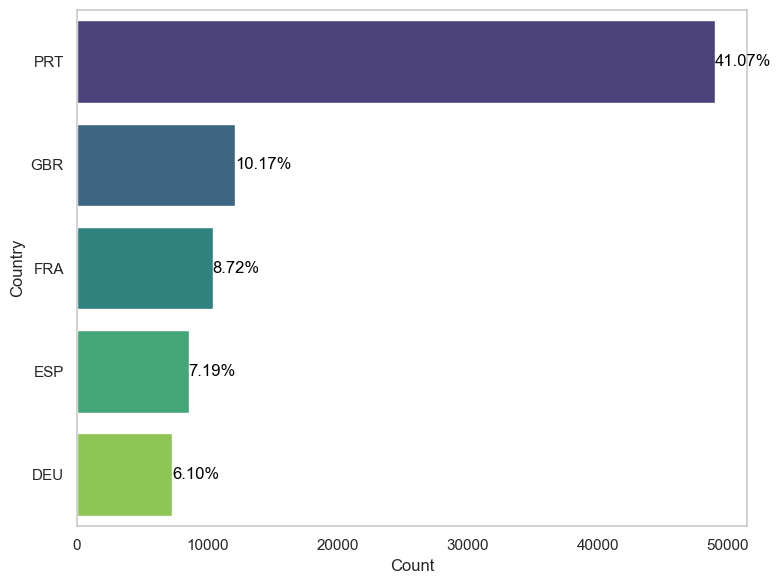

In [108]:
# Assuming test2 is your DataFrame and 'country' is the column with country codes

# Get the counts of each country
country_counts = df['country'].value_counts()

# Select the top 5 countries
top_five_countries = country_counts.head(5)

# Create a DataFrame for the top 5 countries
top_five_countries_df = top_five_countries.reset_index()
top_five_countries_df.columns = ['Country', 'Count']

# Calculate the percentage for each of the top 5 countries based on the entire DataFrame
top_five_countries_percentage = (top_five_countries / len(test2)) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Count', y='Country', data=top_five_countries_df, palette='viridis')

# Annotate the percentages on top of the bars
for index, row in top_five_countries_df.iterrows():
    percentage = top_five_countries_percentage[top_five_countries_df['Country'][index]]
    ax.text(row['Count'], index, f"{percentage:.2f}%", color='black', va='center')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Country')
#plt.title('Top 5 Countries by Count of Appearances (based on the entire DataFrame)')

# Remove grid lines
plt.grid(False)

#saving graph
save_path = '../images/top_5_countries.png'
plt.savefig(save_path)

# Show the plot
plt.tight_layout()
plt.show



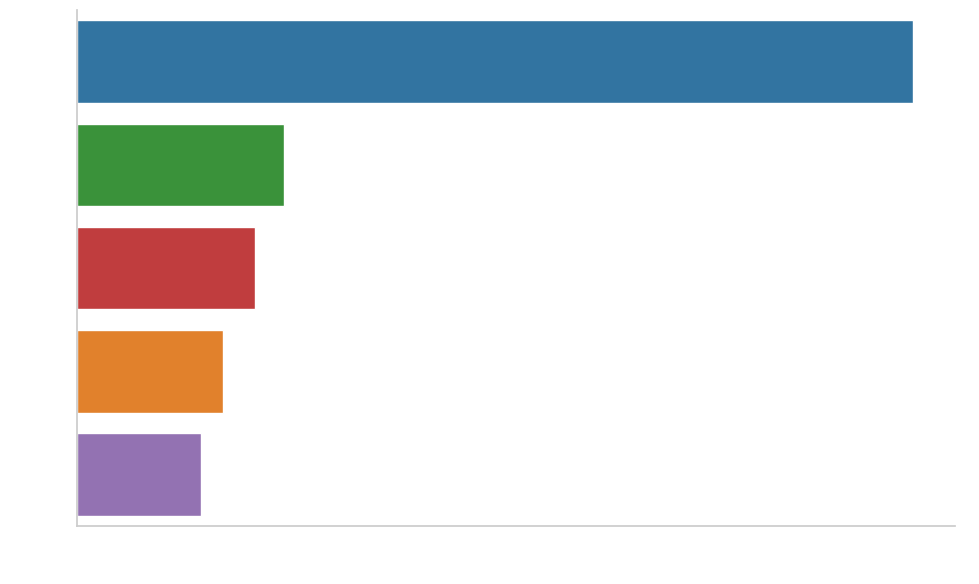

In [109]:
# Same graph above used in the presentation

# Assuming test2 is your DataFrame and 'country' is the column with country codes
# Get the counts of each country
country_counts = df['country'].value_counts()

# Select the top 5 countries
top_five_countries = country_counts.head(5)

# Create a DataFrame for the top 5 countries
top_five_countries_df = top_five_countries.reset_index()
top_five_countries_df.columns = ['Country', 'Count']

# Calculate the percentage for each of the top 5 countries based on the entire DataFrame
top_five_countries_percentage = (top_five_countries / len(test2)) * 100

# Choose colors that stand out from dark grey
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e', '#9467bd']

# Create a bar plot
plt.figure(figsize=(10, 6))  # Increase the width of the figure
ax = sns.barplot(x='Count', y='Country', data=top_five_countries_df, palette=colors)

# Annotate the percentages on top of the bars
for index, row in top_five_countries_df.iterrows():
    percentage = top_five_countries_percentage[top_five_countries_df['Country'][index]]
    ax.text(row['Count'], index, f"{percentage:.2f}%", color='white', va='center')

# Add labels and title
plt.xlabel('Count', color='white')
plt.ylabel('Country', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

# Remove grid lines
ax.grid(False)

# Set background to transparent
ax.set_facecolor('none')

# Remove the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot
save_path = '../images/top_5_countries.png'
plt.savefig(save_path, transparent=True)

# Show the plot
plt.tight_layout()
plt.show()




# Export data to.xlx

In [110]:
df.to_excel('../data/clean/clean_data.xlsx', index=False)
